# Lecture 4.3: Linear Regression for Continuous Outcomes

### 🧠 Learning Objectives
- Fit and interpret linear regression models in Python
- Include categorical and continuous predictors
- Understand confidence intervals and model assumptions
- Apply regression to real epidemiological data


Make sure to include:
- ANOVA on nested models to test added predictive value of predictor
- Producing predicted values to compare model to actual observations
- Model diagnostics

## 🔧 Setup and Load Data

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as sms
import matplotlib.pyplot as plt
import seaborn as sns

# Load Framingham dataset
frame = pd.read_csv("../Data/frmgham2.csv")

## 🎯 1. Simple Linear Regression (OHIE)

Is there an association between age and systolic blood pressure?

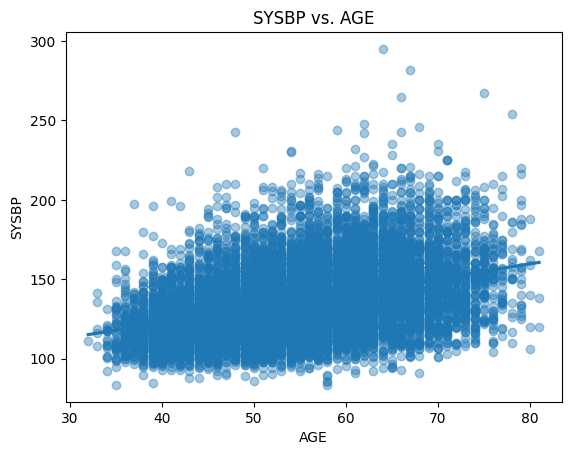

In [3]:
sns.regplot(data=frame, x="AGE", y="SYSBP", scatter_kws={"alpha":0.4})
plt.title("SYSBP vs. AGE")
plt.show()

In [11]:
# Predict PHQ2_sum from hhinc_pctfpl_12m
model1 = smf.ols("SYSBP ~ AGE", data=frame)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  SYSBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2073.
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:50:09   Log-Likelihood:                -51898.
No. Observations:               11627   AIC:                         1.038e+05
Df Residuals:                   11625   BIC:                         1.038e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.5152      1.133     75.487      0.0

## 🎯 2. Multiple Linear Regression (add categorical covariates)

In [5]:
# Include sex and BMI
model2 = smf.ols("SYSBP ~ AGE + SEX + BMI", data=frame).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  SYSBP   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     1074.
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:38:17   Log-Likelihood:                -51182.
No. Observations:               11575   AIC:                         1.024e+05
Df Residuals:                   11571   BIC:                         1.024e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.8637      1.690     27.729      0.0

In [6]:
# Compare model fit of both models
anova_results = sms.anova.anova_lm(model1, model2)
anova_results

df_resid           ssr  df_diff        ss_diff          F         Pr(>F)
0   11625.0  5.128461e+06      0.0            NaN        NaN            NaN
1   11571.0  4.696576e+06     54.0  431884.672327  19.704415  1.924168e-178

This result suggests the bigger model (with covariates) describes the depression data best.

## 3. Model diagnostics

In [7]:
# Add fitted values and residuals (unexplained model error) to dataframe
frame["fitted"] = model2.fittedvalues
frame["resid"] = model2.resid

<Axes: xlabel='SYSBP', ylabel='fitted'>

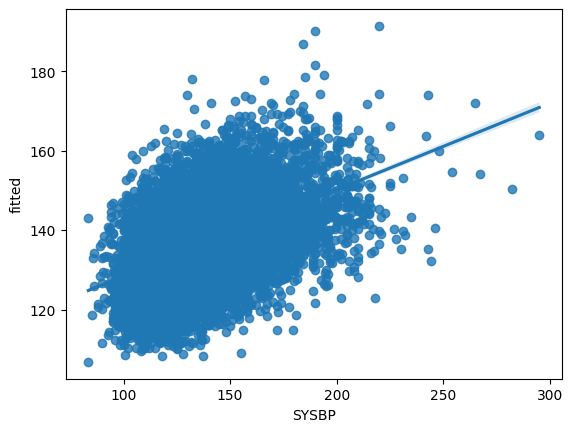

In [9]:
# Compare actual to predicted values
sns.regplot(data = frame, x = 'SYSBP', y = 'fitted')

<Axes: xlabel='fitted', ylabel='resid'>

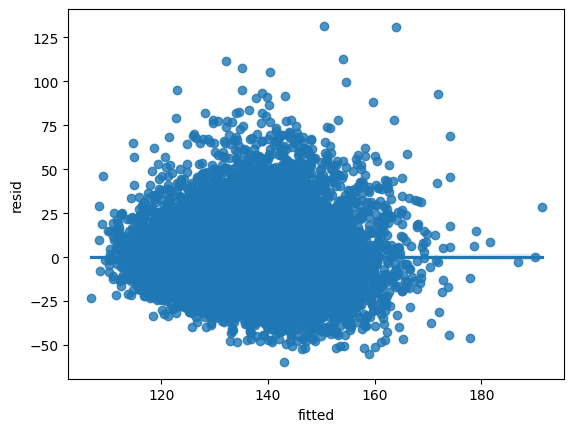

In [10]:
# Plot residuals against fitted values
sns.regplot(data = frame, x = 'fitted', y = 'resid')